# HR Analytics Project

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [2]:
# Importing the data and creating the data frame

url = 'https://raw.githubusercontent.com/ritwiksinha53/Internship/main/First_Phase_Evaluation_Projects/WA_Fn-UseC_-HR-Employee-Attrition.csv'
hr_df = pd.read_csv(url, sep=',')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Statstical Analysis of the data frame

hr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
# Calcuating null values in the data, outcome shows there are no null values in the data

hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Shape of the data frame, 18249 shows number of rows and 14 shows number of columns

hr_df.shape

(1470, 35)

In [21]:
# Datatype of data frame

hr_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [9]:
# Building the correlation matrix
import plotly.figure_factory as ff
corrs = hr_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

<ipython-input-9-d80cc6e23231>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = hr_df.corr()


In [11]:
# There are two columns which shows no correlation coefficient, thus dropping them and checking correlation coefficient again

hr_df.drop(['StandardHours', 'EmployeeCount'], axis=1, inplace=True)
corrs_2 = hr_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs_2.values,
    x=list(corrs_2.columns),
    y=list(corrs_2.index),
    annotation_text=corrs_2.round(2).values,
    showscale=True)
figure.show()

<ipython-input-11-6d52e0614731>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



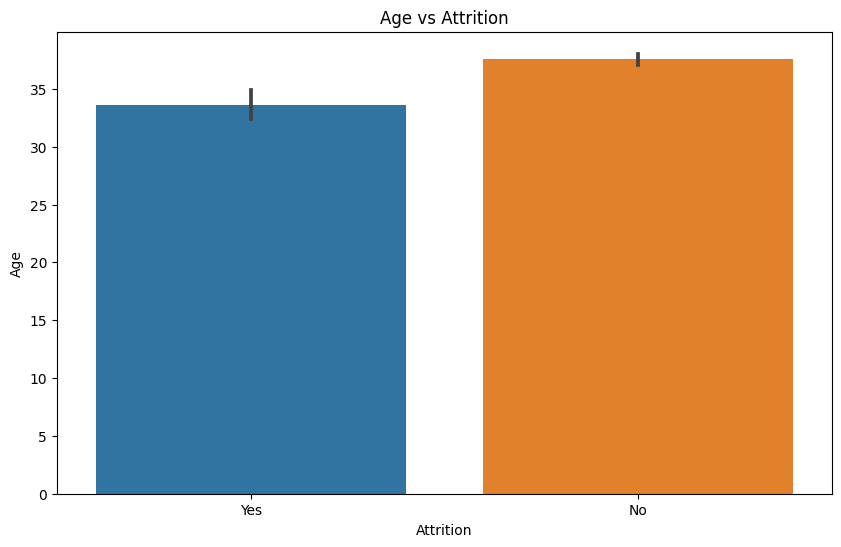

In [14]:
# Analyzing how "Age" affects "Attritionr"

plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='Age', data=hr_df)
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Age vs Attrition')
plt.show()

# The output shows that younger people who are less than 35 years old are more reluctant to leave the company

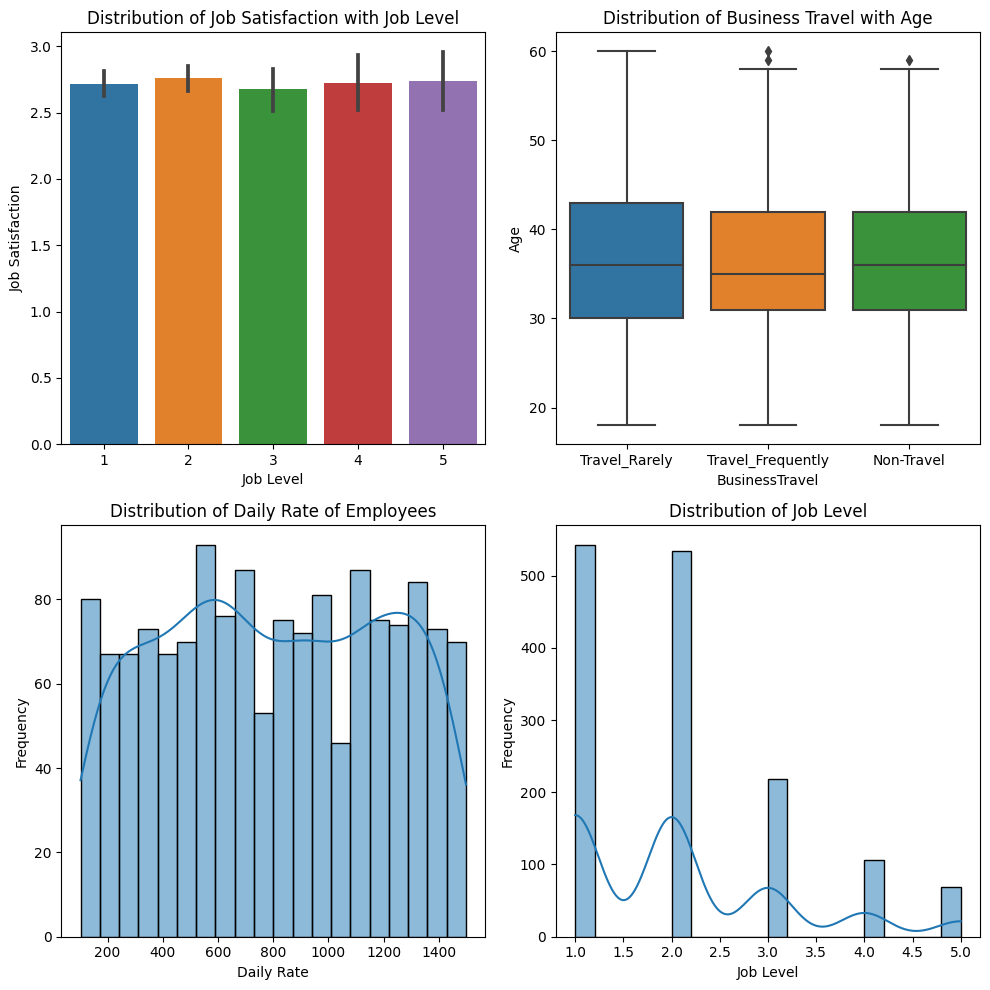

In [20]:
# 2x2 grid for subplots

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Visualize how job satisfaction changes with change in Job level

sns.barplot(x='JobLevel', y='JobSatisfaction', data=hr_df, ax=axes[0, 0])
axes[0, 0].set_xlabel('Job Level')
axes[0, 0].set_ylabel('Job Satisfaction')
axes[0, 0].set_title('Distribution of Job Satisfaction with Job Level')

# Visualize what type of Business Travel is provided in different Ages

sns.boxplot(x='BusinessTravel', y='Age', data=hr_df, ax=axes[0, 1])
axes[0, 1].set_xlabel('BusinessTravel')
axes[0, 1].set_ylabel('Age')
axes[0, 1].set_title('Distribution of Business Travel with Age')

# Visualize the distribution of Daily Rate

sns.histplot(hr_df['DailyRate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Daily Rate')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Daily Rate of Employees')

# Visualize the distribution of Job Level

sns.histplot(hr_df['JobLevel'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Job Level')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Job Level')

plt.tight_layout()
plt.show()

In [25]:
# Converting all the categorical variables into string

hr_df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], axis=1, inplace=True)

In [26]:
X = hr_df.drop('Attrition', axis=1)
y = hr_df['Attrition']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [68]:
# Create a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

lr = LogisticRegression(solver='newton-cg', C=100, penalty='l2', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', solver='newton-cg')

In [69]:
# Make predictions on the test set
y_pred = lr.predict(X_test)
y_pred

array(['Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes'

In [70]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

Accuracy: 0.6666666666666666
ROC AUC: 0.6737875786028082


In [71]:
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[168  79]
 [ 19  28]]
